In [45]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [46]:
Advertise_data = pd.read_csv("ad click data.csv")
Advertise_data.head()

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
0,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
1,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
2,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
3,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
4,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0


In [47]:
Advertise_data.shape

(6657, 14)

In [48]:
Advertise_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6657 entries, 0 to 6656
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VistID          6657 non-null   int64  
 1   Time_Spent      6657 non-null   float64
 2   Age             6657 non-null   int64  
 3   Avg_Income      6657 non-null   float64
 4   Internet_Usage  6657 non-null   float64
 5   Ad_Topic        6657 non-null   object 
 6   Country_Name    6657 non-null   object 
 7   City_code       6657 non-null   object 
 8   Male            6657 non-null   object 
 9   Time_Period     6657 non-null   object 
 10  Weekday         6657 non-null   object 
 11  Month           6657 non-null   object 
 12  Year            6657 non-null   int64  
 13  Clicked         6657 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 728.2+ KB


In [49]:
Advertise_data.describe()

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Year,Clicked
count,6.657000e+03,6657.000000,6657.000000,6657.000000,6657.000000,6657.0,6657.000000
mean,5.542115e+06,66.849548,37.258825,55930.486743,184.947684,2020.0,0.456362
std,2.596284e+06,15.509672,10.995458,13110.339257,43.189896,0.0,0.498129
min,1.000187e+06,32.600000,19.000000,13996.500000,104.780000,2020.0,0.000000
25%,3.307428e+06,55.200000,28.000000,48454.000000,145.730000,2020.0,0.000000
50%,5.523907e+06,70.660000,36.000000,58183.000000,193.580000,2020.0,0.000000
75%,7.823942e+06,79.570000,46.000000,65957.000000,222.260000,2020.0,1.000000
max,9.999708e+06,91.430000,61.000000,79484.800000,269.960000,2020.0,1.000000


In [50]:
Advertise_data.isnull().sum()

VistID            0
Time_Spent        0
Age               0
Avg_Income        0
Internet_Usage    0
Ad_Topic          0
Country_Name      0
City_code         0
Male              0
Time_Period       0
Weekday           0
Month             0
Year              0
Clicked           0
dtype: int64

In [51]:
selectedPredictor= ['Time_Spent','Age','Avg_Income','Internet_Usage','Ad_Topic','City_code', 'Male', 'Time_Period']
FinalData = Advertise_data[selectedPredictor]
FinalData.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period
0,87.97,43,55901.12,185.46,product_11,City_5,No,Mid-Night
1,51.63,50,39132.00,176.73,product_8,City_1,No,Evening
2,82.37,38,57032.36,210.60,product_6,City_2,No,Morning
3,62.06,45,48868.00,190.05,product_19,City_3,Yes,Morning
4,77.66,31,61608.23,204.86,product_11,City_2,No,Noon


In [52]:
FinalData['Male'].replace({'Yes':1,'No':0},inplace= True)
FinalData.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period
0,87.97,43,55901.12,185.46,product_11,City_5,0,Mid-Night
1,51.63,50,39132.00,176.73,product_8,City_1,0,Evening
2,82.37,38,57032.36,210.60,product_6,City_2,0,Morning
3,62.06,45,48868.00,190.05,product_19,City_3,1,Morning
4,77.66,31,61608.23,204.86,product_11,City_2,0,Noon


In [53]:
Final_numData= pd.get_dummies(FinalData)
Final_numData['Clicked']= Advertise_data['Clicked']
Final_numData.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Male,Ad_Topic_product_1,Ad_Topic_product_10,Ad_Topic_product_11,Ad_Topic_product_12,Ad_Topic_product_13,...,City_code_City_7,City_code_City_8,City_code_City_9,Time_Period_Early-Morning,Time_Period_Evening,Time_Period_Mid-Night,Time_Period_Morning,Time_Period_Night,Time_Period_Noon,Clicked
0,87.97,43,55901.12,185.46,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,51.63,50,39132.00,176.73,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,82.37,38,57032.36,210.60,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,62.06,45,48868.00,190.05,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,77.66,31,61608.23,204.86,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [54]:
Final_numData= pd.get_dummies(FinalData)
Final_numData['Clicked']= Advertise_data['Clicked']
Final_numData.head()
Final_numData.columns

Index(['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage', 'Male',
       'Ad_Topic_product_1', 'Ad_Topic_product_10', 'Ad_Topic_product_11',
       'Ad_Topic_product_12', 'Ad_Topic_product_13', 'Ad_Topic_product_14',
       'Ad_Topic_product_15', 'Ad_Topic_product_16', 'Ad_Topic_product_17',
       'Ad_Topic_product_18', 'Ad_Topic_product_19', 'Ad_Topic_product_2',
       'Ad_Topic_product_20', 'Ad_Topic_product_21', 'Ad_Topic_product_22',
       'Ad_Topic_product_23', 'Ad_Topic_product_24', 'Ad_Topic_product_25',
       'Ad_Topic_product_26', 'Ad_Topic_product_27', 'Ad_Topic_product_28',
       'Ad_Topic_product_29', 'Ad_Topic_product_3', 'Ad_Topic_product_30',
       'Ad_Topic_product_4', 'Ad_Topic_product_5', 'Ad_Topic_product_6',
       'Ad_Topic_product_7', 'Ad_Topic_product_8', 'Ad_Topic_product_9',
       'City_code_City_1', 'City_code_City_2', 'City_code_City_3',
       'City_code_City_4', 'City_code_City_5', 'City_code_City_6',
       'City_code_City_7', 'City_code_City_8', 

In [55]:
TargetVariable = 'Clicked'
Predictors = ['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage', 'Male',
       'Ad_Topic_product_1', 'Ad_Topic_product_10', 'Ad_Topic_product_11',
       'Ad_Topic_product_12', 'Ad_Topic_product_13', 'Ad_Topic_product_14',
       'Ad_Topic_product_15', 'Ad_Topic_product_16', 'Ad_Topic_product_17',
       'Ad_Topic_product_18', 'Ad_Topic_product_19', 'Ad_Topic_product_2',
       'Ad_Topic_product_20', 'Ad_Topic_product_21', 'Ad_Topic_product_22',
       'Ad_Topic_product_23', 'Ad_Topic_product_24', 'Ad_Topic_product_25',
       'Ad_Topic_product_26', 'Ad_Topic_product_27', 'Ad_Topic_product_28',
       'Ad_Topic_product_29', 'Ad_Topic_product_3', 'Ad_Topic_product_30',
       'Ad_Topic_product_4', 'Ad_Topic_product_5', 'Ad_Topic_product_6',
       'Ad_Topic_product_7', 'Ad_Topic_product_8', 'Ad_Topic_product_9',
       'City_code_City_1', 'City_code_City_2', 'City_code_City_3',
       'City_code_City_4', 'City_code_City_5', 'City_code_City_6',
       'City_code_City_7', 'City_code_City_8', 'City_code_City_9',
       'Time_Period_Early-Morning', 'Time_Period_Evening',
       'Time_Period_Mid-Night', 'Time_Period_Morning', 'Time_Period_Night',
       'Time_Period_Noon']

X= Final_numData[Predictors].values
y= Final_numData[TargetVariable].values

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size = .2 , random_state = 42)

In [58]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5325, 50)
(1332, 50)
(5325,)
(1332,)


In [60]:
from sklearn import tree
model= tree.DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier()

In [61]:
pred_dt =model.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix
tab1 = confusion_matrix(pred_dt , y_test)
tab1

array([[654,  74],
       [ 62, 542]])

In [63]:
tab1.diagonal().sum() / tab1.sum() * 100

89.7897897897898

In [70]:
model.feature_importances_

array([1.71564442e-01, 3.77251037e-02, 5.60664468e-02, 6.57581503e-01,
       1.57781907e-03, 2.43606496e-03, 3.56635714e-03, 1.75268139e-03,
       1.24472500e-03, 2.19020849e-03, 1.97250147e-04, 3.22871607e-04,
       1.49806441e-03, 3.53016681e-04, 1.25405350e-03, 1.51803477e-04,
       1.77049917e-04, 4.55182026e-04, 3.62445862e-04, 1.04867625e-03,
       7.90100379e-04, 1.13789175e-03, 1.71641796e-03, 1.28463160e-03,
       2.23867205e-03, 3.52669509e-03, 6.72899790e-04, 9.92615573e-04,
       1.25963711e-03, 2.12247843e-04, 1.38088007e-03, 4.85009148e-04,
       2.17907526e-03, 1.45254261e-03, 1.20377672e-03, 4.60600641e-03,
       2.83531073e-03, 1.83169492e-03, 9.94482533e-04, 4.95959566e-03,
       2.17992919e-03, 1.14863911e-04, 3.32578540e-04, 0.00000000e+00,
       5.23288641e-03, 5.22874212e-03, 2.93869479e-04, 1.94789010e-03,
       3.33145226e-03, 4.05183937e-03])

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_dt)

0.8978978978978979

<Axes: >

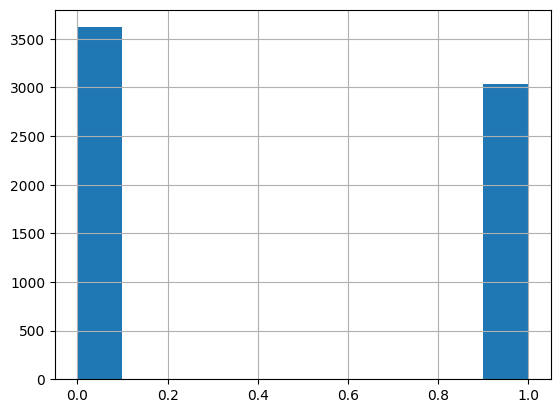

In [25]:
Advertise_data['Clicked'].hist()

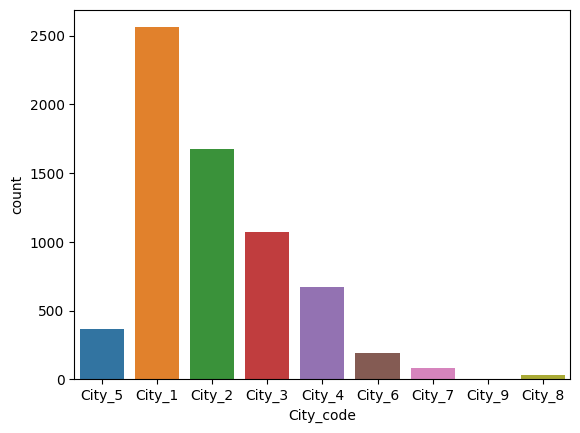

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x= 'City_code',data= Advertise_data)
plt.show()

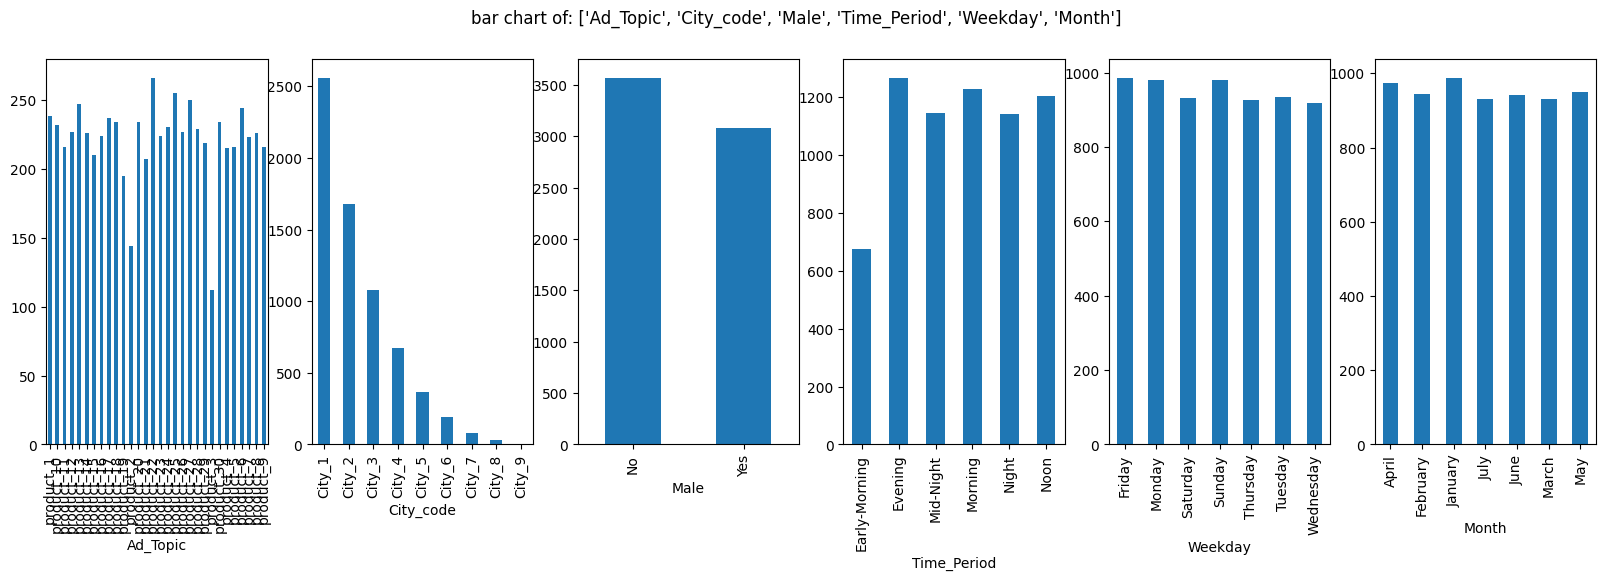

In [26]:
def plotbarchart(inpData, Colstoplot):
    %matplotlib inline

    import matplotlib.pyplot as plt


    fig, subplot = plt.subplots(nrows = 1, ncols= len(Colstoplot), figsize = (20,5))
    # OR fig, subplot = plt.subplots(nrows= len(Colstoplot),ncols=1, figsize = (5,15))
    fig.suptitle("bar chart of: " + str(Colstoplot))

    for colnum, plotnum in zip (Colstoplot, range(len(Colstoplot))):
        inpData.groupby(colnum).size().plot(kind='bar',ax= subplot[plotnum])
plotbarchart(inpData=Advertise_data , Colstoplot= ["Ad_Topic","City_code", "Male","Time_Period", "Weekday","Month"])

array([[<Axes: title={'center': 'Time_Spent'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Avg_Income'}>,
        <Axes: title={'center': 'Internet_Usage'}>]], dtype=object)

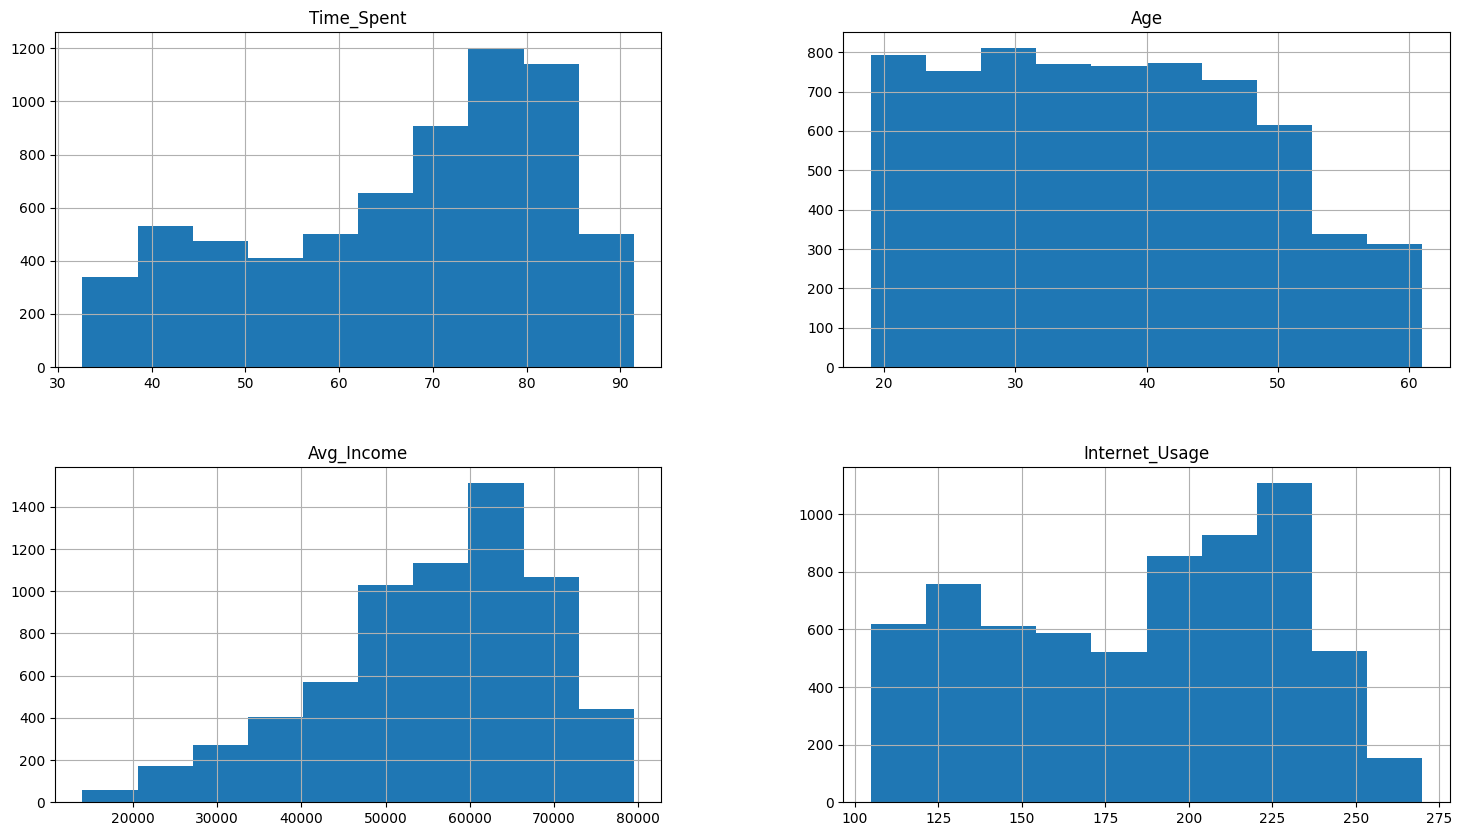

In [ ]:
Advertise_data.hist(['Time_Spent','Age','Avg_Income','Internet_Usage','Ad_Topic'],figsize=(18,10))

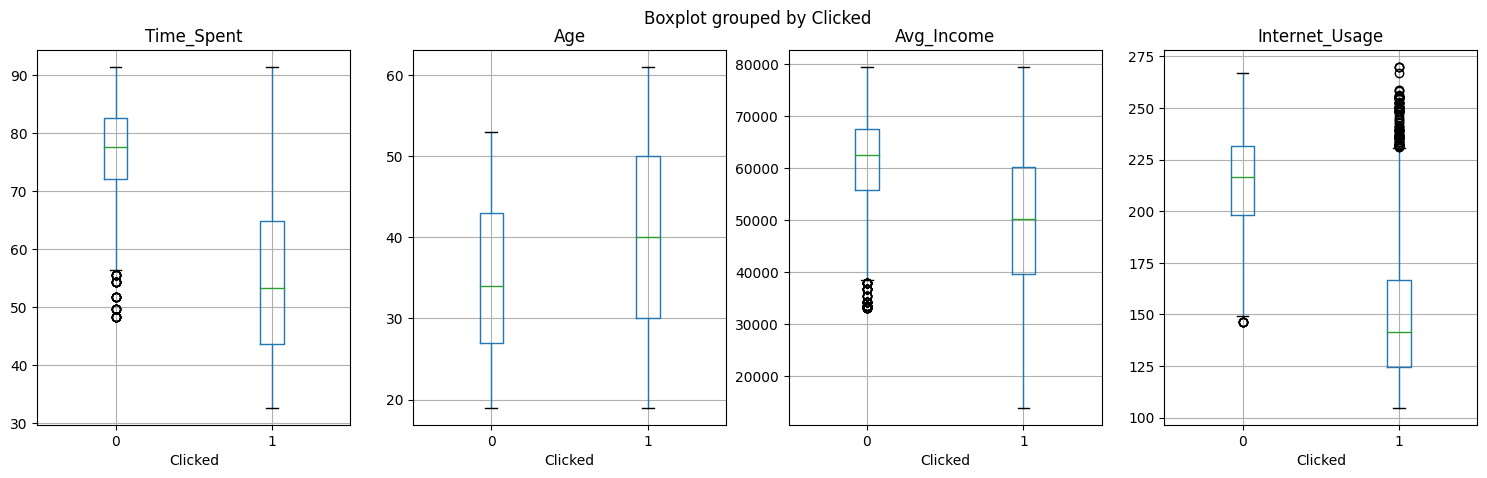

In [ ]:
ContinuousColList= ['Time_Spent','Age','Avg_Income','Internet_Usage']

import matplotlib.pyplot as plt

fig, subplot = plt.subplots(nrows= 1, ncols= len (ContinuousColList), figsize= (18,5))

for i, plotnum in zip(ContinuousColList, range(len(ContinuousColList))):
    Advertise_data.boxplot(column = i, by= 'Clicked', figsize= (18,5), vert= True, ax=subplot[plotnum])




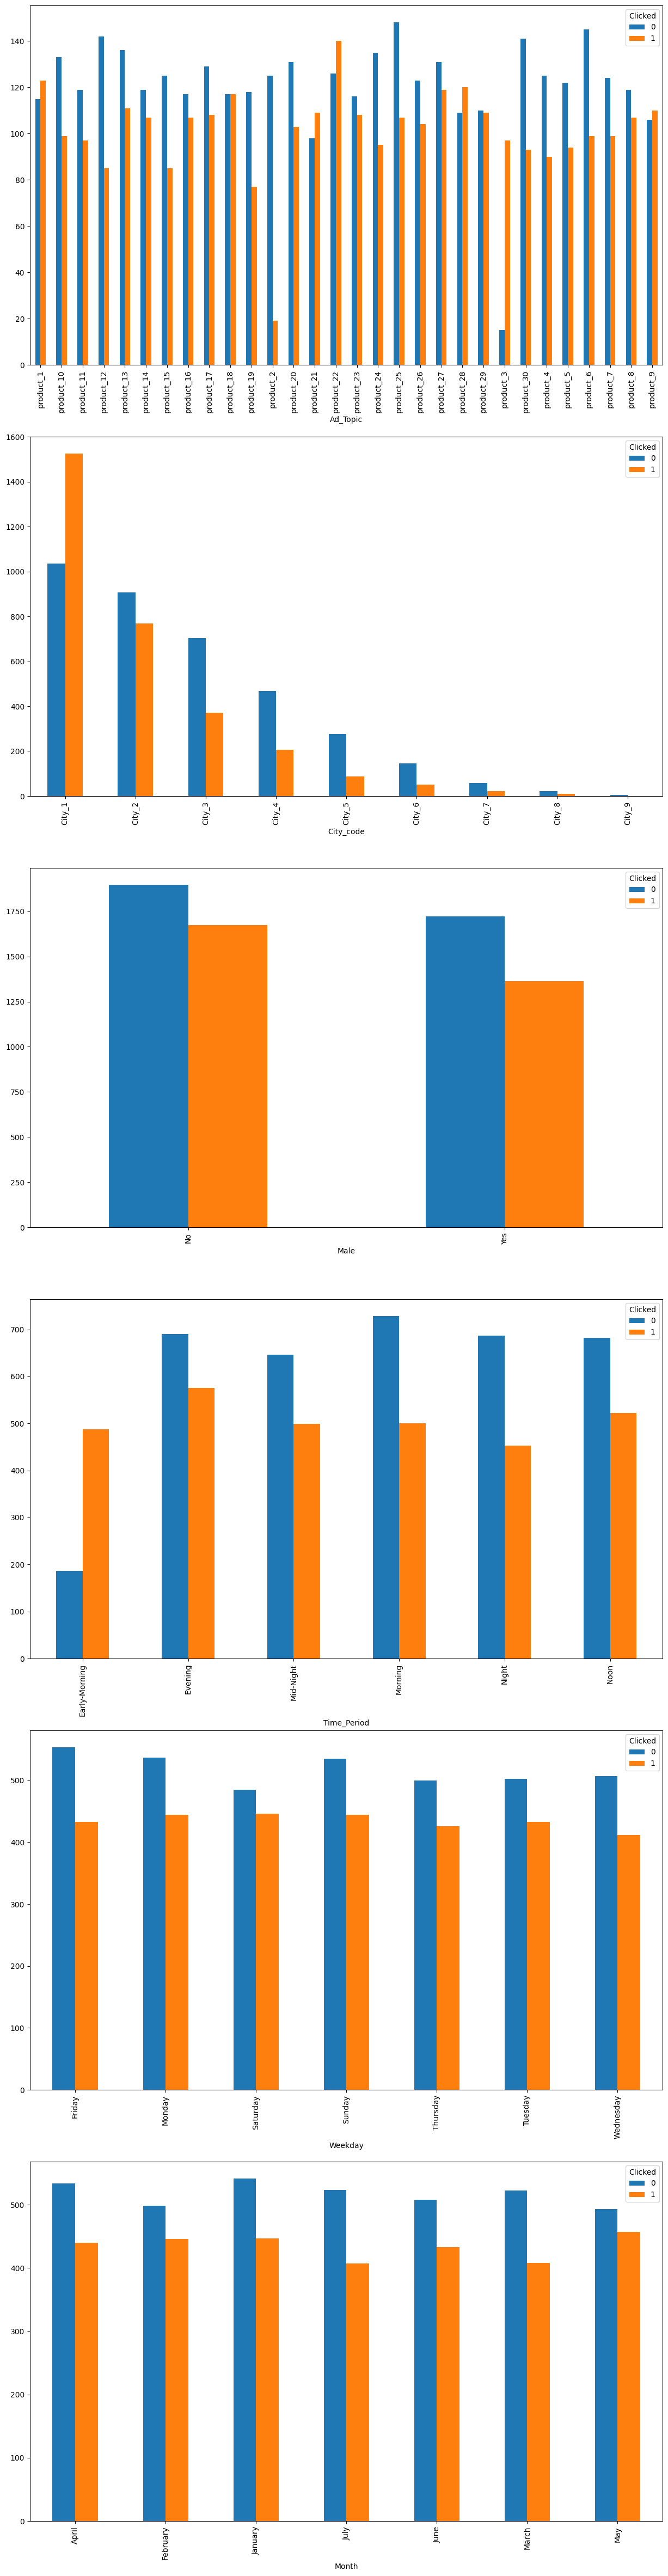

In [ ]:
CategoricalList= ["Ad_Topic","City_code", "Male", "Time_Period", "Weekday","Month"]

import matplotlib.pyplot as plt

fig, subplot= plt.subplots(nrows= len(CategoricalList),figsize= (15,60))


for colnum, plotnum in zip( CategoricalList, range(len(CategoricalList))):
    crosstabResult= pd.crosstab(index= Advertise_data[colnum], columns= Advertise_data['Clicked'])
    crosstabResult.plot.bar(ax= subplot[plotnum])